In [412]:
%cd shared/Band1/


/shared/Band1


In [4]:
import rasterio
import rasterio.features
import rasterio.warp
import rasterio.plot
from rasterio.mask import mask
import matplotlib.pyplot as plt
import numpy as np
import os
import geopandas as gpd
from osgeo import gdalnumeric
import pandas as pd
cropshape = gpd.read_file('Crops_2016/2016_Crops.shp')
from sklearn import preprocessing
#cropshape.crs = {"init": 'epsg:26910'}
#cropshape = cropshape.to_crs('+proj=utm +zone=10 +ellps=WGS84 +datum=WGS84 +units=m +no_defs')
#cropshape.crs

In [7]:
%cd Desktop/shared/augband1/

/shared/augband1


In [8]:
actuallist = sorted(os.listdir())[:-6]
actuallist

['2409443.jp2',
 '2410507.jp2',
 '2421884.jp2',
 '2427901.jp2',
 '2428538.jp2',
 '2443846.jp2',
 '2443847.jp2',
 '2445030.jp2',
 '2702369.jp2',
 '2770078.jp2',
 '2770079.jp2',
 '2770462.jp2',
 '2770463.jp2',
 '2770898.jp2',
 '2770899.jp2',
 '2770900.jp2',
 '2771102.jp2',
 '2771103.jp2',
 '2771489.jp2',
 '2771490.jp2',
 '2771691.jp2',
 '2771692.jp2',
 '2771693.jp2',
 '2772757.jp2',
 '2772758.jp2',
 '2772759.jp2',
 '2804451.jp2',
 '2804452.jp2',
 '2875156.jp2',
 '2875157.jp2',
 '2875158.jp2',
 '2875159.jp2',
 '2875160.jp2',
 '2875161.jp2',
 '2875162.jp2',
 '2875163.jp2',
 '2875164.jp2',
 '2875520.jp2',
 '2875945.jp2',
 '2875946.jp2',
 '2875947.jp2',
 '2875948.jp2',
 '2875949.jp2',
 '2875950.jp2',
 '2875951.jp2',
 '2875952.jp2',
 '2876569.jp2',
 '2876570.jp2',
 '2876571.jp2',
 '2876572.jp2',
 '2876573.jp2',
 '2876574.jp2',
 '2876575.jp2',
 '2876576.jp2',
 '2877283.jp2',
 '2877284.jp2',
 '2877285.jp2',
 '2877286.jp2',
 '2877287.jp2',
 '2877288.jp2',
 '2877289.jp2',
 '2877290.jp2',
 '288696

In [216]:
%cd ..
%cd Band9/

/shared
/shared/Band9


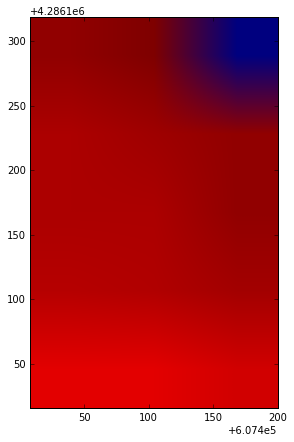

In [9]:
pic1 = rasterio.open('4102736.jp2')

fig,ax = plt.subplots(1,figsize=(7,7))
bounds = rasterio.plot.plotting_extent(pic1)
rasterio.plot.show(pic1,with_bounds=True, extent = bounds, ax=ax)

In [10]:
pic1.close()

In [70]:
actuallist = sorted(direct)[:-6]
len(actuallist)

15332

In [74]:
band3test = pd.DataFrame(index=range(len(actuallist)),columns=['OBJECTID','firstquart','med','thirdquart'])

In [107]:
stuff = pic1.read()
stuffers =  [np.percentile(stuff,25), np.mean(stuff), np.percentile(stuff,75)]

In [90]:
pd.DataFrame([one,two,three])

,0
0,255.000000
1,562.851754
2,1056.000000


In [36]:
firstarray = pic1.read()

In [169]:
tester = [[None,None,None,None]]*len(actuallist)

In [170]:
for i in  range(len(actuallist)):
    pic1 = rasterio.open(actuallist[i])
    reader = pic1.read()
    reader2 = reader[reader!= 0]
    try:
        stuffers = [actuallist[i][:-4],np.percentile(reader2,40),np.mean(reader2),np.percentile(reader2,75)]
    except IndexError:
        stuffers = [actuallist[i][:-4],0,0,0]
    pic1.close()
    tester[i] = stuffers
    

In [161]:
reader.squeeze().sq

array([1121, 1084, 1017, 1235, 1001, 1028, 1084, 1002, 1042,  950, 1001,
        995, 1040,  951, 1026, 1148, 1193,  999, 1076, 1132, 1110,  945,
       1065, 1100,  949, 1117, 1073,  255,  255,  255,  255,  255,  255,
        255,  255,  255,  255,  255,  255,  255,  255,  255,  255,  255,
        255,  255,  255,  255,  255,  255,  255,  255,  255,  255], dtype=uint16)

'3050642.jp2'

In [15]:
def bandcollector(path):
    os.chdir('..')
    os.chdir(path)
    tester = [[None,None,None,None]]*len(actuallist)
    for i in  range(len(actuallist)):
        pic1 = rasterio.open(actuallist[i])
        reader = pic1.read()
        reader2 = reader[reader!= 0]
        try:
            stuffers = [actuallist[i][:-4],np.percentile(reader2,40),np.mean(reader2),np.percentile(reader2,50),np.percentile(reader2,75),reader2.std(),np.percentile(reader2,25)]
        except IndexError:
            stuffers = [actuallist[i][:-4],0,0,0]
        pic1.close()
        tester[i] = stuffers
        findf = pd.DataFrame([i for i in tester],columns=['OBJECTID',path+'40per',path+'mean',path+'median',path+'thirdquart',path+'std deviation',path+'firstquart'])
    return(findf)



In [414]:
band3 = bandcollector('Band3')


In [415]:
band2 =bandcollector('Band2')

In [416]:
band4 = bandcollector('Band4')
band5 = bandcollector('Band5')
band6 = bandcollector('Band6')
band7 = bandcollector('Band7')
band8 = bandcollector('Band8')

In [417]:
band1 = bandcollector('Band1')
band9 = bandcollector('Band9')
band10 = bandcollector('Band10')

In [418]:
bands = band1.merge(band2)
bands = bands.merge(band3)
bands = bands.merge(band4)
bands = bands.merge(band5)
bands = bands.merge(band6)
bands = bands.merge(band7)
bands = bands.merge(band8)
bands = bands.merge(band9)
bands = bands.merge(band10)

In [13]:
%cd augband1/

/shared/augband1


In [16]:
augband1 = bandcollector('augband1')

In [18]:
augband2 = bandcollector('augband2')
augband3 = bandcollector('augband3')
augband4 = bandcollector('augband4')
augband5 = bandcollector('augband5')
augband6 = bandcollector('augband6')

augband7 = bandcollector('augband7')
augband8 = bandcollector('augband8')

In [25]:
bands = augband1.merge(augband2)
bands = bands.merge(augband3)
bands = bands.merge(augband4)
bands = bands.merge(augband5)
bands = bands.merge(augband6)
bands = bands.merge(augband7)
bands = bands.merge(augband8)
bands.to_csv('getacquaintedwithkiwifruitmonth.csv')

In [433]:
cropshape['OBJECTID'] = cropshape['OBJECTID'].astype(str)


In [24]:
%cd GeoSpatial-Classification/


/home/rus/GeoSpatial-Classification


In [434]:
CbandDensity = bands.merge(cropshape)

In [435]:
CbandDensity.to_csv('updateddf.csv')

In [422]:
%cd GeoSpatial-Classification/

/home/rus/GeoSpatial-Classification


In [426]:
bands.merge(cropshape)

,OBJECTID,Band140per,Band1mean,Band1median,Band1thirdquart,Band1std deviation,Band1firstquart,Band240per,Band2mean,Band2median,...,loc_narr,is_active,size,size_units,crop_list,calc_acres,mtrs,hq_distric,site_distr,geometry


In [424]:
bands.to_csv('dfwsdandmed.csv',index = False)

In [406]:
CbandDensity.to_csv('ColorbandsDF.csv',index =False)

In [281]:
CbandDensity.crop_list[CbandDensity.is_active != '1'] = 'UNCULTIVATED'

/home/rus/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [287]:
nonones = CbandDensity.drop(CbandDensity.crop_list[CbandDensity.crop_list ==''].index)

In [327]:
hold = pd.DataFrame(['UNCULTIVATED' in i for i in nonones.crop_list ],index=nonones.index)
nouncultivatedfields = nonones.drop(nonones[nonones['crop_list'].str.contains('UNCULTIVATED') ].index)

In [326]:
OAT 338
SAFFLOWER 348
CORN 355
WALNUT 600
GRAPE 676
RICE 773
UNKNOWN 1021
ALMOND 1099
SUNFLOWER SEED 1216
WHEAT 1323
UNCULTIVATED AG 1444
ALFALFA 1541
TOMATO PROCESS 1702

Index(['OBJECTID', 'Band1first', 'Band1mean', 'Band1third', 'Band2first',
       'Band2mean', 'Band2third', 'Band3first', 'Band3mean', 'Band3third',
       'Band4first', 'Band4mean', 'Band4third', 'Band5first', 'Band5mean',
       'Band5third', 'Band6first', 'Band6mean', 'Band6third', 'Band7first',
       'Band7mean', 'Band7third', 'Band8first', 'Band8mean', 'Band8third',
       'Band9first', 'Band9mean', 'Band9third', 'Band10first', 'Band10mean',
       'Band10third', 'county_num', 'pk_site_id', 'site_id', 'pk_permit_',
       'permit_num', 'permittee', 'permit_yr', 'p_eff_date', 'p_exp_date',
       'status', 'Version', 'MostRecAll', 'MostRecYr', 'site_name', 'loc_narr',
       'is_active', 'size', 'size_units', 'crop_list', 'calc_acres', 'mtrs',
       'hq_distric', 'site_distr', 'geometry'],
      dtype='object')

In [340]:
tomatoandalfalfa = nouncultivatedfields[nouncultivatedfields.crop_list.str.contains('TOMATO') | nouncultivatedfields.crop_list.str.contains('ALFALFA')] 

In [351]:
colorbands = tomatoandalfalfa.iloc[:,:31]

In [370]:
colorbands['crop_list'] = tomatoandalfalfa.crop_list

In [373]:
colorbands.loc[colorbands.crop_list.str.contains('TOMATO'),'crop_list']  = 'TOMATO'

In [401]:
fullx = colorbands.iloc[:,1:-1]
fully = np.where(colorbands['crop_list'] == 'TOMATO',0,1)


In [382]:
from sklearn.model_selection import train_test_split

In [402]:
X_train, X_test, Y_train, Y_test = train_test_split(fullx,fully,test_size = .4)

In [408]:
from sklearn import svm
from sklearn import tree

In [403]:
clf = svm.SVC()
clf.fit(X_train,Y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [405]:
clf.score(X_test,Y_test)

0.95791245791245794